<a href="https://colab.research.google.com/github/AparajitaSingh121416/Deep-Learning-and-Machine-learning/blob/main/Foodie_computer_vision_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-01-19 04:26:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.0MB/s    in 6.1s    

2024-01-19 04:26:35 (17.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
#Unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

#Inspect the data
A very crucial step at the beginning of any machne learning project is becoming one with the data.
And for a computer vision project... this usually means visualizing many samples of the data


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os
#walk through pizza_steak directory and list the number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:

!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 19 04:26 .
drwxr-xr-x 1 root root 4096 Jan 19 04:26 ..
drwxr-xr-x 4 root root 4096 Jan 19 04:26 test
drwxr-xr-x 4 root root 4096 Jan 19 04:26 train


In [ ]:
#Another way to find out how many images are ina file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
#to visualize the images, we will get class names programmically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))#Creates a list of class_names for the subdirectory

print(class_names)

['pizza' 'steak']


In [ ]:
#Visualizing the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  #Setting up the target directory from where we'll view the images
  target_folder= target_dir+target_class
  #Get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  #Read in the image and read it using matplotlib
  img=mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")#Showing the shape of the image
  return img


Image shape: (384, 512, 3)


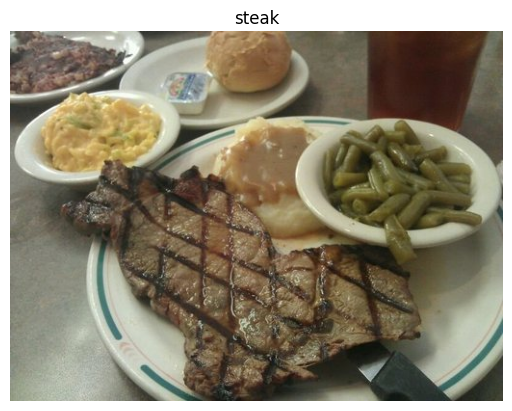

In [ ]:
#View a random image from the training dataset
img= view_random_image(target_dir="pizza_steak/train/",
                       target_class="steak")

Image shape: (512, 382, 3)


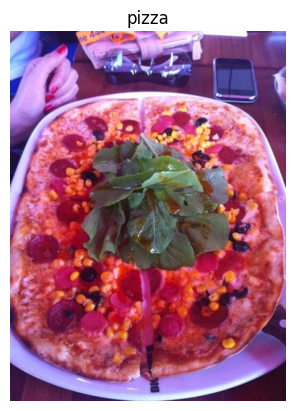

In [ ]:
img= view_random_image(target_dir="pizza_steak/train/",
                       target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[155, 115, 186],
        [154, 114, 185],
        [153, 113, 183],
        ...,
        [123, 128, 228],
        [121, 126, 226],
        [117, 122, 222]],

       [[153, 113, 184],
        [152, 112, 183],
        [150, 110, 180],
        ...,
        [122, 126, 226],
        [119, 123, 223],
        [114, 118, 218]],

       [[154, 112, 184],
        [151, 109, 181],
        [149, 107, 179],
        ...,
        [117, 119, 219],
        [112, 114, 214],
        [107, 109, 209]],

       ...,

       [[ 71,  27,  78],
        [ 69,  25,  76],
        [ 65,  23,  73],
        ...,
        [ 45,  11,  27],
        [ 45,  11,  27],
        [ 45,  11,  27]],

       [[ 68,  24,  75],
        [ 67,  23,  74],
        [ 64,  22,  72],
        ...,
        [ 44,  10,  26],
        [ 44,  10,  26],
        [ 44,  10,  26]],

       [[ 64,  20,  71],
        [ 63,  19,  70],
        [ 61,  19,  69],
        ...,
        [ 43,   9,  2

In [ ]:
#Viewing the image
img.shape #return width, height and color channels

(512, 382, 3)

**NOTE**: many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale(also referred to as normalize) their pixel values by dividing the image arrays by 225.(since 255 is the maximum pixel value).

In [ ]:
#Getting all the pixel values between 0 and 1 (scaling/normalizing the data)
img/255.

array([[[0.60784314, 0.45098039, 0.72941176],
        [0.60392157, 0.44705882, 0.7254902 ],
        [0.6       , 0.44313725, 0.71764706],
        ...,
        [0.48235294, 0.50196078, 0.89411765],
        [0.4745098 , 0.49411765, 0.88627451],
        [0.45882353, 0.47843137, 0.87058824]],

       [[0.6       , 0.44313725, 0.72156863],
        [0.59607843, 0.43921569, 0.71764706],
        [0.58823529, 0.43137255, 0.70588235],
        ...,
        [0.47843137, 0.49411765, 0.88627451],
        [0.46666667, 0.48235294, 0.8745098 ],
        [0.44705882, 0.4627451 , 0.85490196]],

       [[0.60392157, 0.43921569, 0.72156863],
        [0.59215686, 0.42745098, 0.70980392],
        [0.58431373, 0.41960784, 0.70196078],
        ...,
        [0.45882353, 0.46666667, 0.85882353],
        [0.43921569, 0.44705882, 0.83921569],
        [0.41960784, 0.42745098, 0.81960784]],

       ...,

       [[0.27843137, 0.10588235, 0.30588235],
        [0.27058824, 0.09803922, 0.29803922],
        [0.25490196, 0

#Things to be done
Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:
1)Load our images.
2)Preprocess our images.
3)Build a CNN to find patterns in our images.
4)Compile our CNN
5)Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#set the seed
tf.random.set_seed(42)
#Preprocessing the data
train_datagen=ImageDataGenerator(rescale=1./225)
valid_datagen=ImageDataGenerator(rescale=1./225)
#Setting up paths to our training directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"
#Importing data from directories and turning them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
#Building a cnn model
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 164ms/step - loss: 0.5754 - accuracy: 0.6773 - val_loss: 0.4534 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 7s 142ms/step - loss: 0.4220 - accuracy: 0.8060 - val_loss: 0.3649 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3853 - accuracy: 0.8333 - val_loss: 0.3577 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3361 - accuracy: 0.8607 - val_loss: 0.3007 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.2829 - accuracy: 0.8893 - val_loss: 0.2985 - val_accuracy: 0.8840


#If the above cell is taking longer than 10 seconds per epoch, it is advisable to use GPU

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
#Building another model from tensorflow playground
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 8s 149ms/step - loss: 0.8624 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Conclusion
despite having 20x more parameters than our CNN(model_1),model_2 performs erribly. Going to tweak the model and see if it can improved

In [ ]:
#Set the sedd
tf.random.set_seed(42)
#Creating the model (same)
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 111ms/step - loss: 2.6464 - accuracy: 0.6287 - val_loss: 1.5418 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.7175 - accuracy: 0.7253 - val_loss: 0.5123 - val_accuracy: 0.7300
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.6229 - accuracy: 0.7307 - val_loss: 0.5877 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 6s 126ms/step - loss: 0.4918 - accuracy: 0.7813 - val_loss: 0.5386 - val_accuracy: 0.7280
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4855 - accuracy: 0.7833 - val_loss: 0.4440 - val_accuracy: 0.8000


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


15 MILLION TRAINABLE PARAMS, MY GOD!

Trainable parameters are patterns a model can learn from data. In most cases, more the number of cases, better it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers have differet learnable parameters connected to each other and hence a higher number of possible learnable patterns, A CNN seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our CNN, these are often more helpful in deciphering between different features in an image.

#Binary classification:Breaking it down
1)Become one with data(visualize,visualize,visualize)
2)Preprocess the data(prepared it for our mode i.e, the main step here was scaling/normalizing and tuning the data into batches)
3)Create a model(start with a baseline)
4)Fit the model
5)Evaluate the model
6)Adjust different parameters and improve the model(Trying to beat the baseline)
7)Repeating until satisfied.(experiment,experiment,experiment)

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


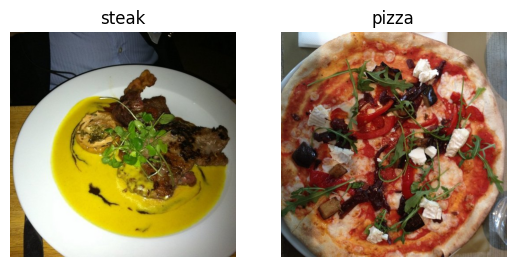

In [ ]:
#Becoming one with data
#Visualizing the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

In [ ]:
#Preprocessing our data
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

Next step in the mist is thurning our data into **batches**
A batch is a small subset of data. Rather than looking at all images at once(close to 10k), a model  ight only look at 32 at a time.
It does this for a couple of reasons:
1)10k or more images might not fit into the memory of the processor(GPU).
2)Trying to learn the patterns n 10k images in one hit could result in the model not being able to learn very well.

In [ ]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
#Load in our image data from directories and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,#  Target directory of images
                                             target_size=(224,224),#Target size of images
                                             class_mode="binary",#type of data you're working with
                                             batch_size=32)#size of minibatches to load data into
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Creating baseline model
a baseline model is basically a simpler model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Creating the baseline model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",#if "same" output shape is same, if "valid", output shape is valid
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_4=model_4.fit(train_data,

                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 142ms/step - loss: 2.5162 - accuracy: 0.6607 - val_loss: 0.4550 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4371 - accuracy: 0.8060 - val_loss: 0.3771 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.3518 - accuracy: 0.8607 - val_loss: 0.3456 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.2436 - accuracy: 0.9227 - val_loss: 0.3432 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.1243 - accuracy: 0.9667 - val_loss: 0.3237 - val_accuracy: 0.8500


<Axes: >

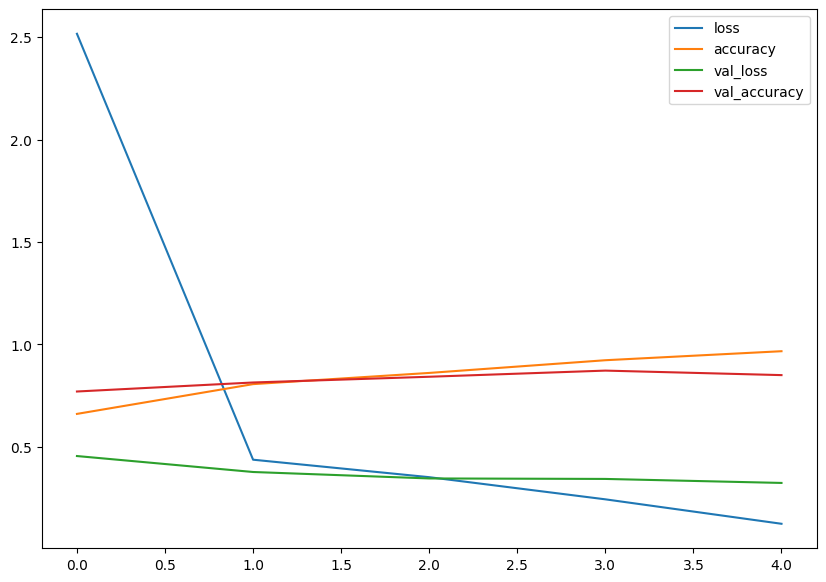

In [ ]:
#Evaluating our data
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
#Plotting validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))#How many epochs we run for

  #Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  #Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

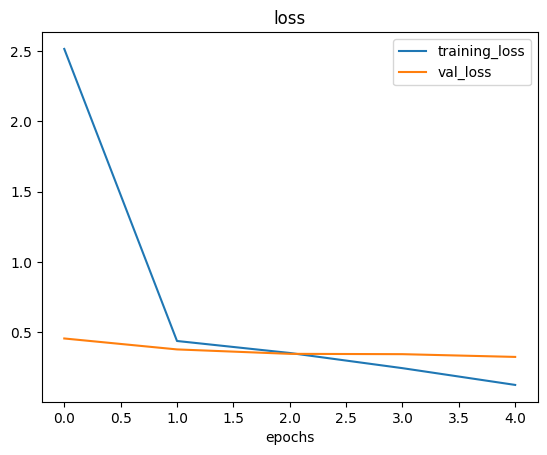

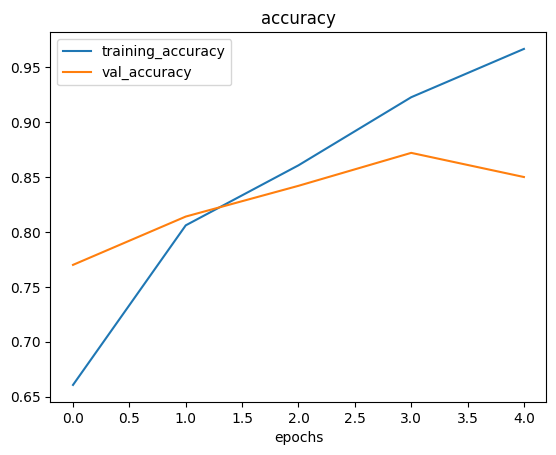

In [ ]:
plot_loss_curves(history_4)

In [ ]:
#Creating a model which is above the baseline
model_5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 127ms/step - loss: 0.5721 - accuracy: 0.6920 - val_loss: 0.4631 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4572 - accuracy: 0.7927 - val_loss: 0.3841 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4031 - accuracy: 0.8287 - val_loss: 0.3480 - val_accuracy: 0.8860
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.3729 - accuracy: 0.8400 - val_loss: 0.3370 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3550 - accuracy: 0.8507 - val_loss: 0.3236 - val_accuracy: 0.8700


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

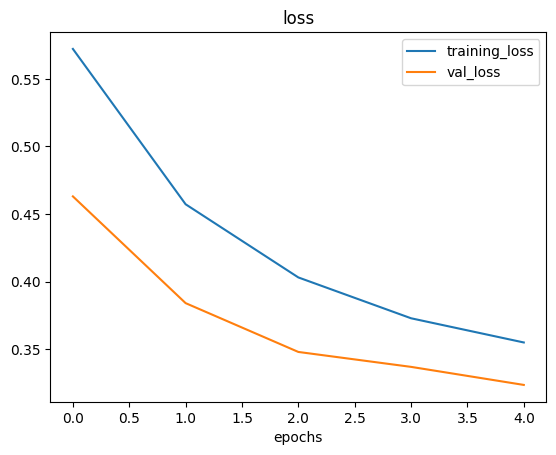

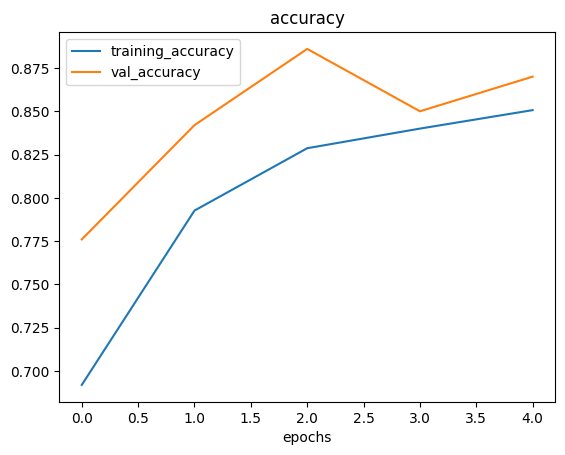

In [ ]:
plot_loss_curves(history_5)

In [ ]:
#Creating ImageDataGenerator training instances with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
#Importing data and augment it from training directory
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)
print("Non-augmented training data:")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)
IMG_SIZE=(224,224)
print("Non-augmented test data:")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=32,
                                           class_mode="binary")

Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
#Getting sample augmented data
images,labels=train_data.next()
augmented_images, augmented_labels=train_data_augmented.next()


showing image number:3


(-0.5, 223.5, 223.5, -0.5)

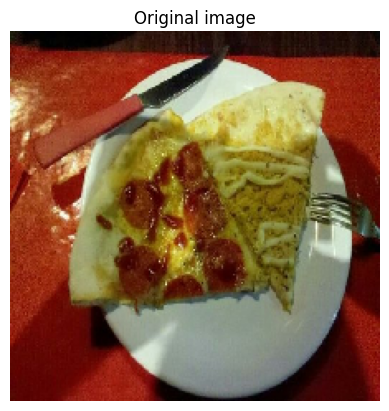

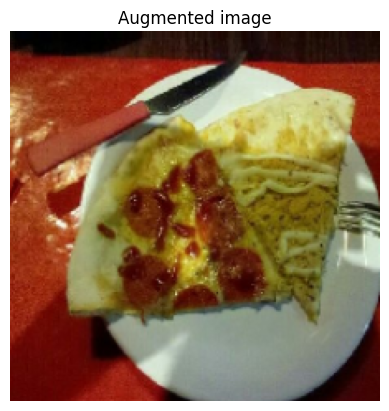

In [ ]:
import random
random_number=random.randint(0,32)
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [ ]:
model_6=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 21s 438ms/step - loss: 0.7008 - accuracy: 0.4813 - val_loss: 0.6799 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6831 - accuracy: 0.5373 - val_loss: 0.6409 - val_accuracy: 0.6040
Epoch 3/5
47/47 [==============================] - 23s 482ms/step - loss: 0.6630 - accuracy: 0.6293 - val_loss: 0.8032 - val_accuracy: 0.5320
Epoch 4/5
47/47 [==============================] - 20s 436ms/step - loss: 0.6785 - accuracy: 0.5707 - val_loss: 0.6023 - val_accuracy: 0.6860
Epoch 5/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6754 - accuracy: 0.5900 - val_loss: 0.6217 - val_accuracy: 0.7280


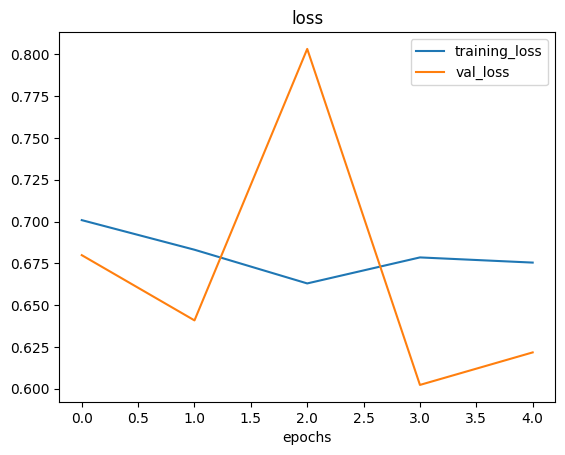

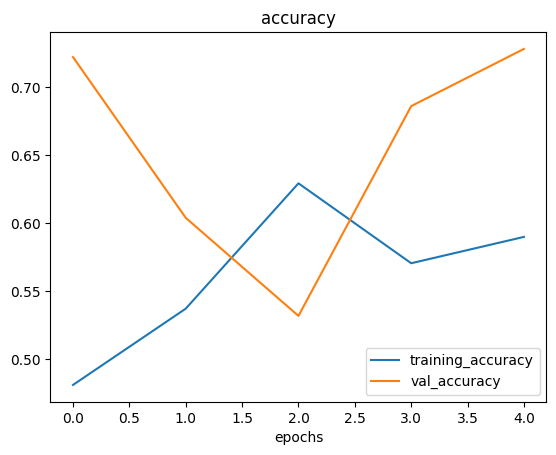

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                          target_size=(224,224),
                                                                          class_mode="binary",
                                                                          batch_size=32,
                                                                          shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_7=model_7.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 23s 458ms/step - loss: 0.6763 - accuracy: 0.5720 - val_loss: 0.6221 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 20s 436ms/step - loss: 0.5888 - accuracy: 0.6833 - val_loss: 0.5812 - val_accuracy: 0.6980
Epoch 3/5
47/47 [==============================] - 22s 464ms/step - loss: 0.5535 - accuracy: 0.7193 - val_loss: 0.4814 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 22s 464ms/step - loss: 0.5239 - accuracy: 0.7453 - val_loss: 0.4675 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 21s 456ms/step - loss: 0.4897 - accuracy: 0.7700 - val_loss: 0.4007 - val_accuracy: 0.8260
